In [2]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Nomor 1

In [1]:
def power(x,n):
    return x**n

power(2,5)

32

In [3]:
def deret_geometri(x,n):
    xx = []
    for i in range(1,n+1):
        xx.append(x**i)
    return xx

deret_geometri(2,5)

[2, 4, 8, 16, 32]

In [4]:
def factorial(x):
    if x <= 1:
        return 1
    else:
        return x*factorial(x-1)
    
factorial(3)

6

In [5]:
def deret_factorial(n):
    fac = []
    for i in range(1,n+1):
        fac.append(factorial(i))
    return fac

deret_factorial(4)

[1, 2, 6, 24]

In [52]:
def exp(x):
    n = 0
    sum = 0
    threshold = 0.0001
    current = 1
    previous = 0

    while True:
        sum += power(x,n) / factorial(n)
        current = sum

        if abs(current - previous) <= threshold:
            break

        previous = current
        n += 1
    
    return current, n

In [53]:
exp(1)

(2.71827876984127, 8)

In [6]:
math.exp(1)

2.718281828459045

## Nomor 2

### A

In [8]:
data = pd.read_csv("datakuis.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-12,6694.583984,6722.373047,6670.521973,6722.373047,6722.373047,158712000
1,2023-06-13,6722.373047,6744.038086,6697.070801,6719.014160,6719.014160,176568000
2,2023-06-14,6718.874023,6744.644043,6672.855957,6699.716797,6699.716797,178279800
3,2023-06-15,6699.716797,6717.456055,6660.909180,6713.794922,6713.794922,151187300
4,2023-06-16,6713.515137,6726.456055,6669.335938,6698.546875,6698.546875,172061800


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       235 non-null    object 
 1   Open       235 non-null    float64
 2   High       235 non-null    float64
 3   Low        235 non-null    float64
 4   Close      235 non-null    float64
 5   Adj Close  235 non-null    float64
 6   Volume     235 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.0+ KB


### B

In [27]:
### Cara 1
for i in range(len(data)):
    if data.loc[i, 'Open'] < data.loc[i, 'Close']:
        data.loc[i, 'Kenaikan'] = "Naik"
    elif data.loc[i, 'Open'] > data.loc[i, 'Close']:
        data.loc[i, 'Kenaikan'] = "Turun"
    else:
        data.loc[i, 'Kenaikan'] = "Tetap"

In [25]:
### Cara 2
data["Kenaikan"] = ["Naik" if data["Close"][i]>data["Open"][i] 
                    else "Turun" if data["Close"][i]<data["Open"][i] 
                    else "Tetap" 
                    for i in range(data.shape[0])]

In [28]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Kenaikan
0,2023-06-12,6694.583984,6722.373047,6670.521973,6722.373047,6722.373047,158712000,Naik
1,2023-06-13,6722.373047,6744.038086,6697.070801,6719.014160,6719.014160,176568000,Turun
2,2023-06-14,6718.874023,6744.644043,6672.855957,6699.716797,6699.716797,178279800,Turun
3,2023-06-15,6699.716797,6717.456055,6660.909180,6713.794922,6713.794922,151187300,Naik
4,2023-06-16,6713.515137,6726.456055,6669.335938,6698.546875,6698.546875,172061800,Turun
...,...,...,...,...,...,...,...,...
230,2024-06-04,7071.094238,7149.192871,7065.034180,7099.312012,7099.312012,160663800,Naik
231,2024-06-05,7114.535156,7118.349121,6934.942871,6947.669922,6947.669922,137116300,Turun
232,2024-06-06,6992.562988,7032.574219,6939.545898,6974.896973,6974.896973,129986000,Turun
233,2024-06-07,6987.793945,6994.115234,6887.812012,6897.950195,6897.950195,109886700,Turun


In [34]:
data.groupby("Kenaikan").agg("count")

,Date,Open,High,Low,Close,Adj Close,Volume
Kenaikan,,,,,,,
Naik,124,124,124,124,124,124,124
Turun,111,111,111,111,111,111,111


### C

In [70]:
data.to_excel('data_kenaikan.xlsx', index = False, header=True)

### D

In [36]:
### Cara 1
def counting(input):
    naik = 0
    turun = 0
    tetap = 0
    for i in range(len(input)):
        if input[i] == "Naik":
            naik += 1
        elif input[i] == "Turun":
            turun += 1
        else:
            tetap += 1

    return {"Naik":naik, "Turun":turun, "Tetap":tetap}

In [42]:
counting(data['Kenaikan'])

{'Naik': 124, 'Turun': 111, 'Tetap': 0}

### E

<function matplotlib.pyplot.show(close=None, block=None)>

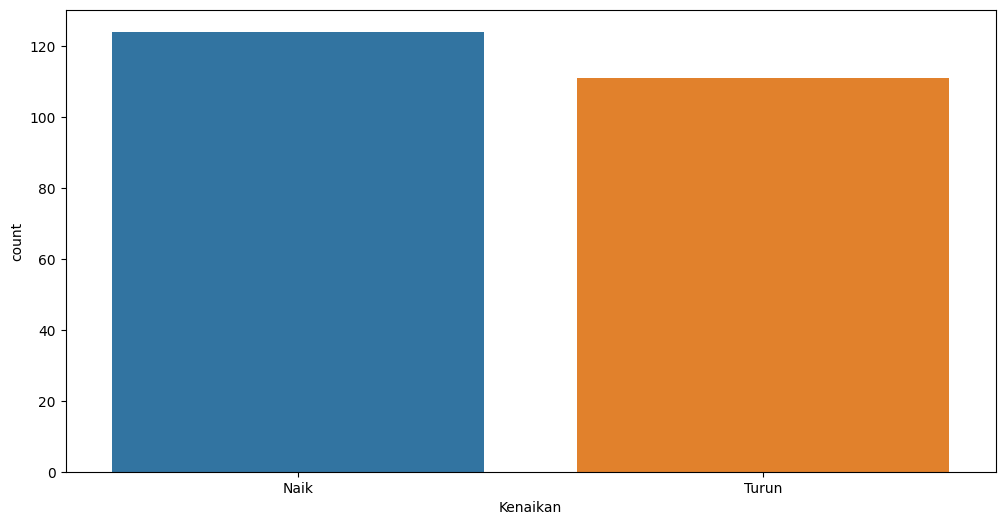

In [86]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Kenaikan', data = data, hue = 'Kenaikan')
plt.show